<a href="https://colab.research.google.com/github/malleswarrao/app_analysis_project/blob/main/playstoredata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 
## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**A warm welcom to my analysis hope it will help you to find the best analitical survey**

In [3]:
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [6]:
path='/content/drive/My Drive/almabetter/Copy of Play Store Data.csv'

In [7]:
df=pd.read_csv(path)

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
df.shape

(10841, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
df=df.dropna(subset=['Rating'],axis=0)

In [15]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [16]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df.drop([10472],inplace=True)

In [18]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [19]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True) #or with mean or median

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [21]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
temp=df[df['Size']=='Varies with device'].index
df.drop(labels=temp,inplace=True)

In [25]:
New_size=[]
for i in df['Size']:
      rep=i.replace('M','e3')
      rep=rep.replace('k','')
      rep=rep.replace('+',' ')
      New_size.append(float(rep))
      #New_size.append(i.replace('M','').replace('+',' ').replace('k',' ').strip())

In [26]:
df['Size']=New_size

Price variable – remove $ sign and convert to float

In [27]:
New_price=[]
for i in df['Price']:
    if i[0]=='$':
        New_price.append(i[1:])
    else:
        New_price.append(i)

In [28]:
df.drop(labels=df[df['Price']=='Everyone'].index,inplace=True)

In [29]:
df['Price']=New_price

In [30]:
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [31]:
df['Price']=df['Price'].astype('float')


In [32]:
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
install2=[]
for j in df['Installs']:
    install2.append(j.replace(',','').replace('+','').strip())

In [34]:
df['Installs']=install2

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
df['Installs']=df['Installs'].astype('int')
df['Reviews']=df['Reviews'].astype('int')

In [37]:
df.loc[(df['Rating']<=1)&(df['Rating']>=5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [38]:
df['Type'].value_counts()

Free    7150
Paid     579
Name: Type, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

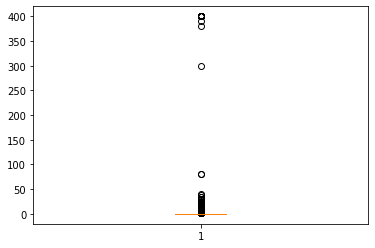

In [39]:
plt.boxplot(df['Price'])
plt

In [40]:
df.loc[df['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
def insights_func(new_df_k,ki):
  size_vs_installs = new_df_k[['Size','Installs']]
  size_vs_installs = size_vs_installs.loc[~size_vs_installs['Size'].isin(['Varies with device'])]
  size_vs_installs.set_index('Size',inplace=True)
  size_vs_installs.sort_index(inplace=True)
  plt.figure()
  plt.title(ki)
  plt.xlabel('size') 
  plt.ylabel('Installs')
  plt.plot(size_vs_installs)
  plt.show()
  #insights for free vs paid installs
  paid_vs_free = df.groupby(['Type'])['Installs'].sum()
  paid_vs_free.plot(kind='bar')
  plt.title(ki)
  plt.show()
  #insights for content rating vs installs
  content_vs_installs = df.groupby(['Content Rating'])['Installs'].sum()
  content_vs_installs.plot(kind = 'bar')
  plt.title(ki)
  plt.show()
  #insights for rating vs installs
  size_vs_installs = df[['Rating','Installs']]
  # size_vs_installs = size_vs_installs.loc[~size_vs_installs['Size'].isin(['Varies with device'])]
  size_vs_installs.set_index('Rating',inplace=True)
  size_vs_installs.sort_index(inplace=True)
  plt.figure()
  plt.title(ki)
  plt.xlabel('Rating') 
  plt.ylabel('Installs')
  plt.plot(size_vs_installs)
  plt.show()
  #insights for version vs installs
  version_vs_installs = new_df_k.groupby(['Android Ver'])['Installs'].sum().sort_values(ascending=False)
  version_vs_installs.plot(kind = 'bar')
  plt.title(ki)
  plt.show()

['BUSINESS', 'PRODUCTIVITY', 'GAME', 'HOUSE_AND_HOME', 'LIFESTYLE', 'SHOPPING', 'PHOTOGRAPHY', 'BEAUTY', 'NEWS_AND_MAGAZINES', 'FINANCE', 'EDUCATION', 'MEDICAL', 'COMMUNICATION', 'EVENTS', 'TOOLS', 'FOOD_AND_DRINK', 'BOOKS_AND_REFERENCE', 'PERSONALIZATION', 'VIDEO_PLAYERS', 'ART_AND_DESIGN', 'FAMILY', 'SPORTS', 'LIBRARIES_AND_DEMO', 'WEATHER', 'HEALTH_AND_FITNESS', 'SOCIAL', 'TRAVEL_AND_LOCAL', 'COMICS', 'DATING', 'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'PARENTING', 'MAPS_AND_NAVIGATION']


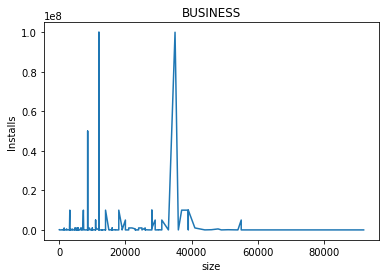

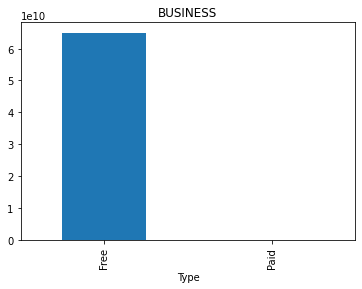

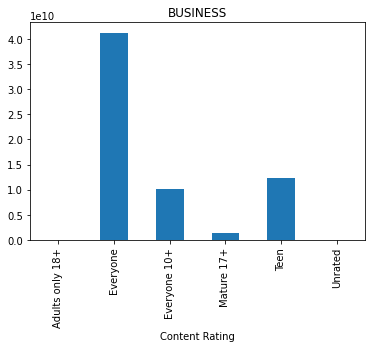

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


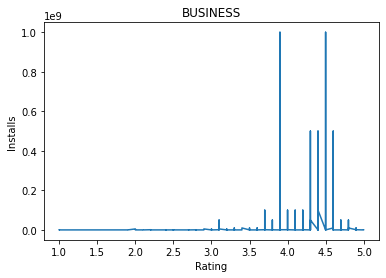

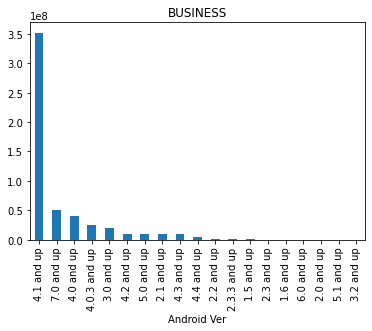

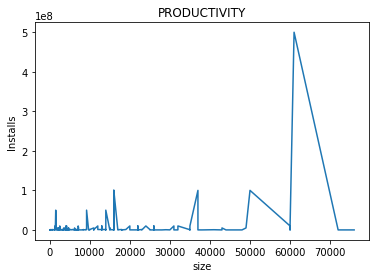

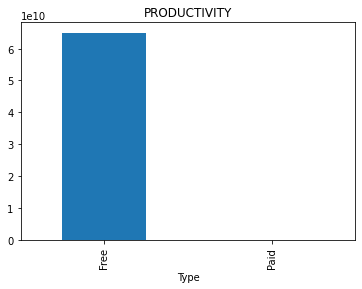

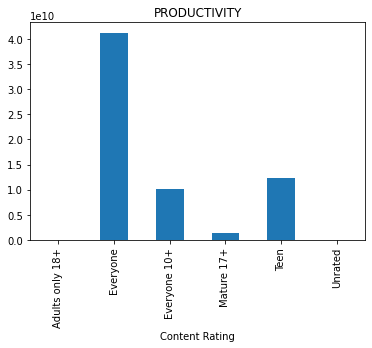

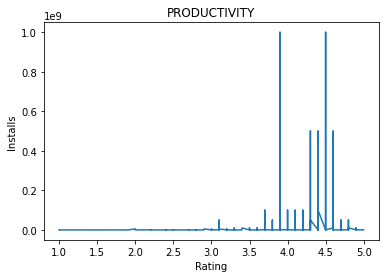

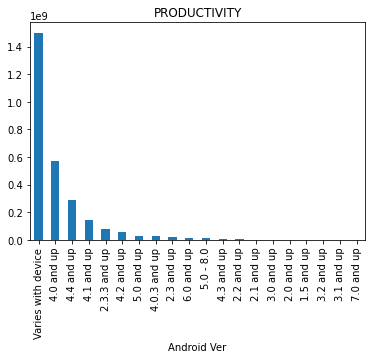

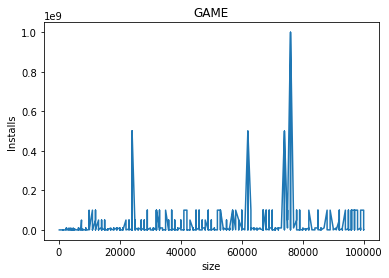

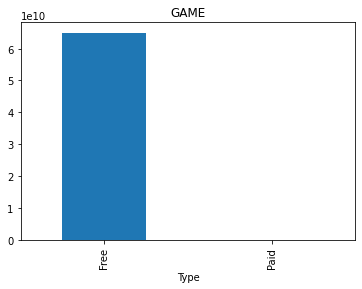

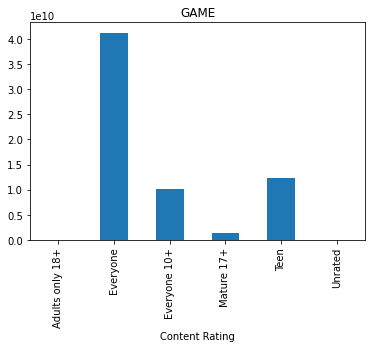

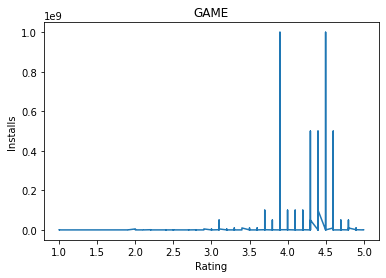

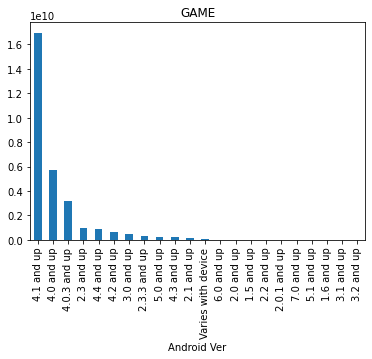

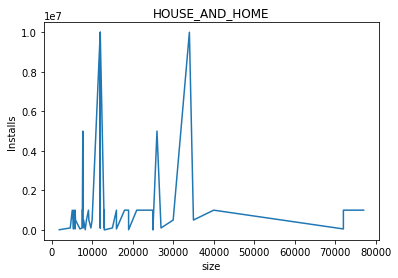

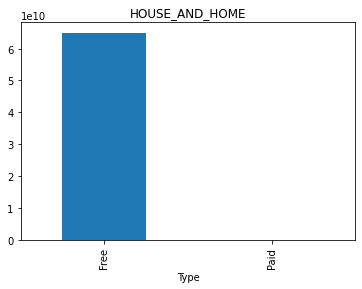

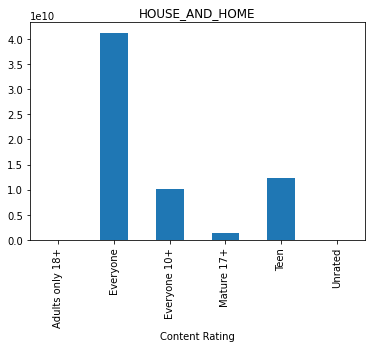

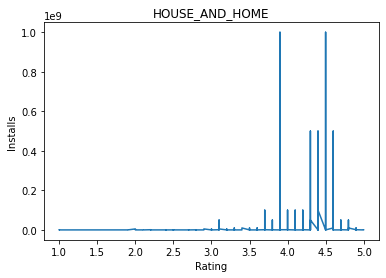

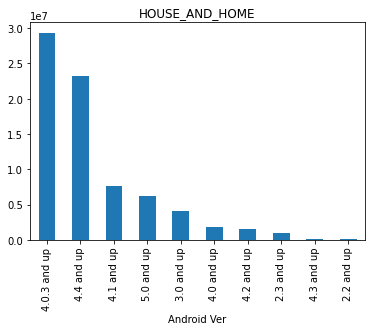

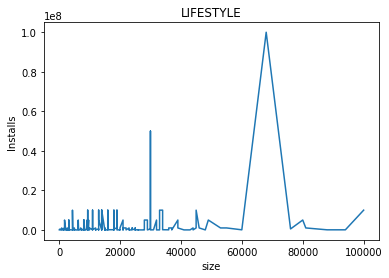

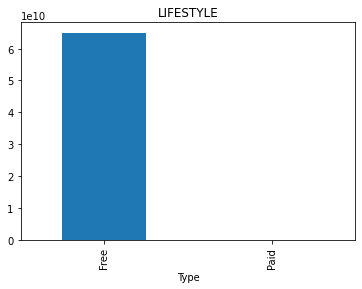

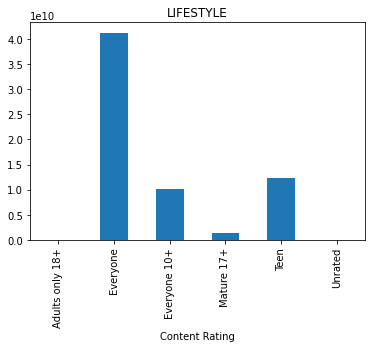

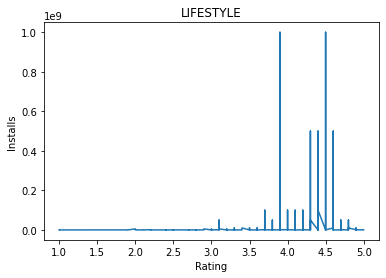

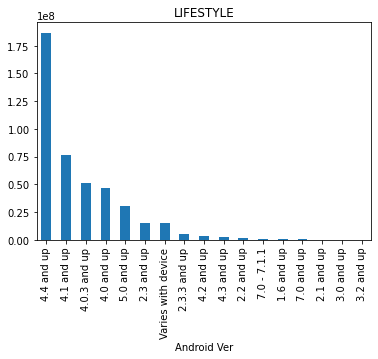

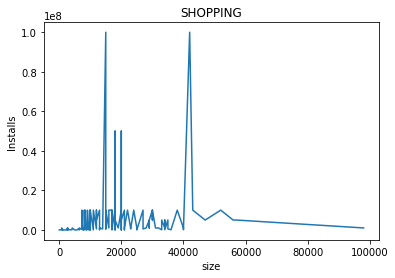

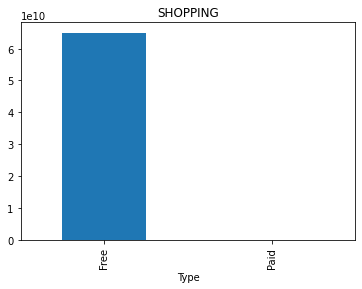

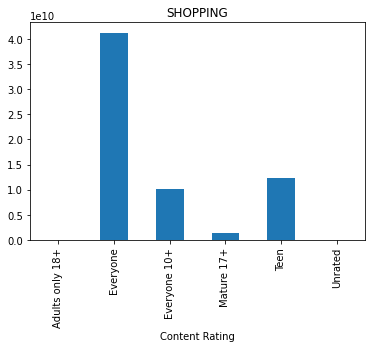

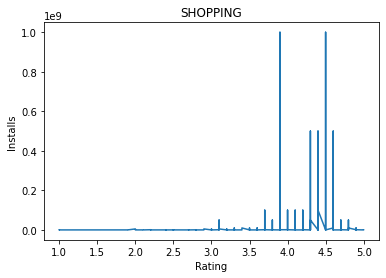

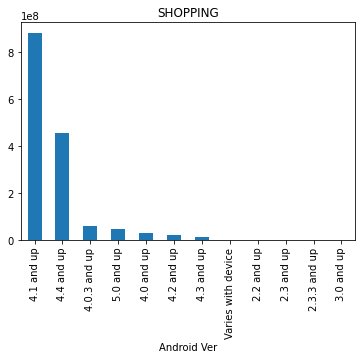

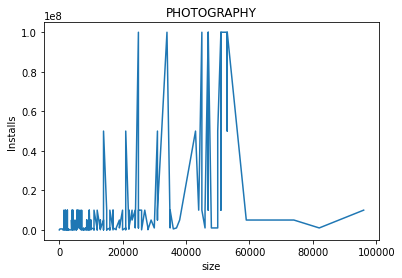

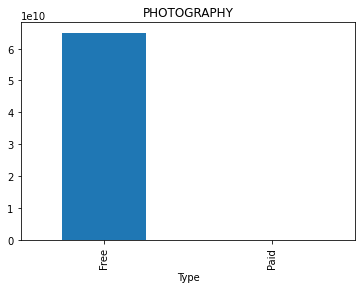

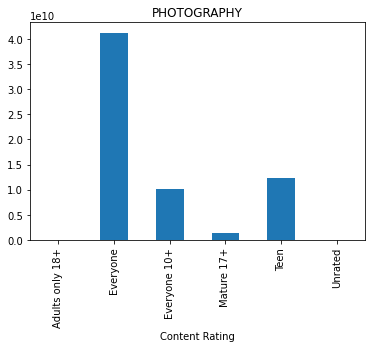

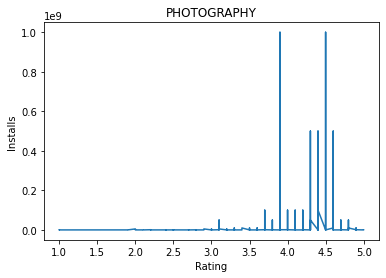

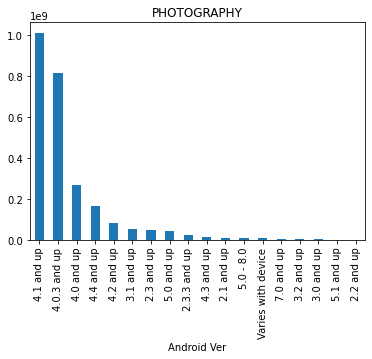

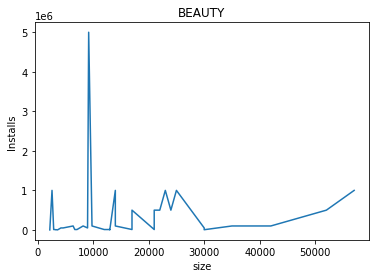

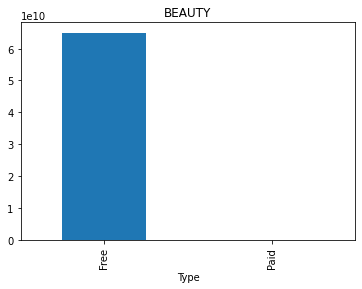

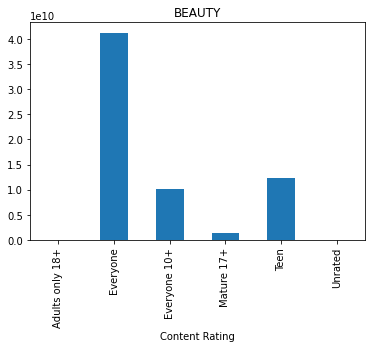

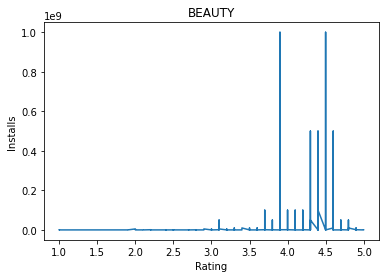

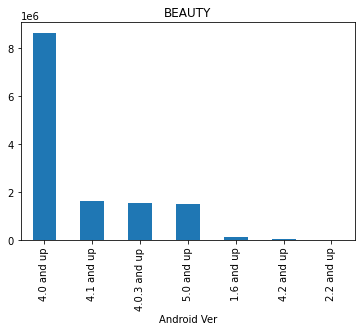

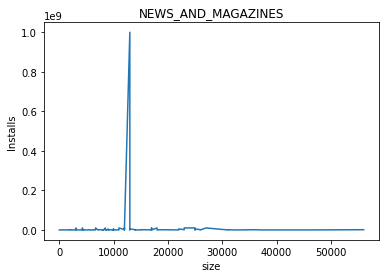

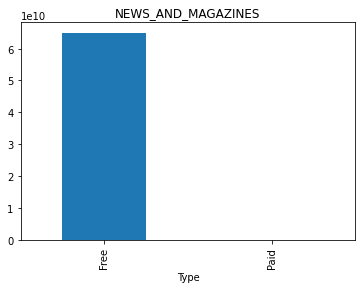

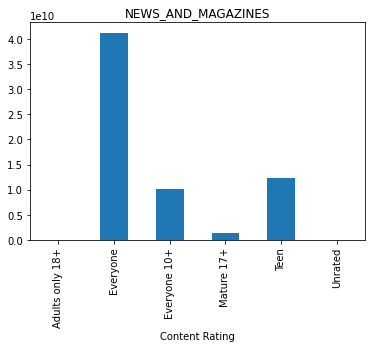

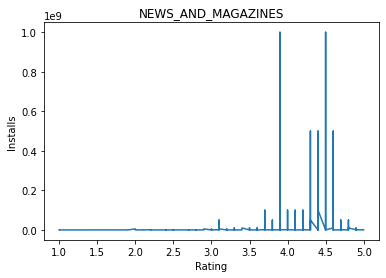

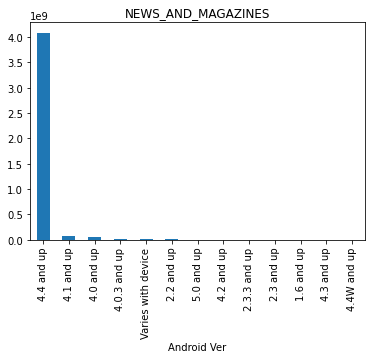

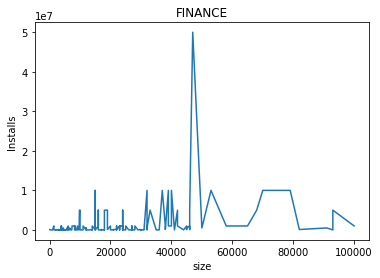

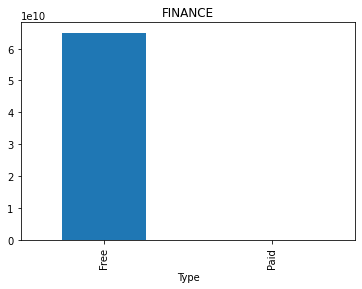

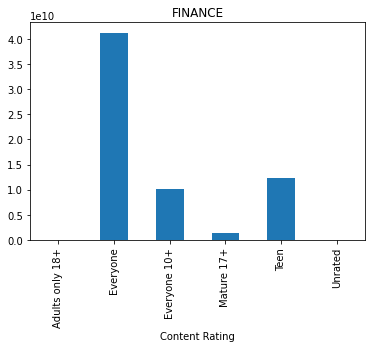

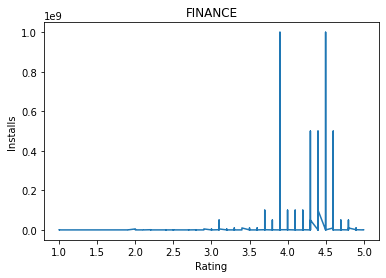

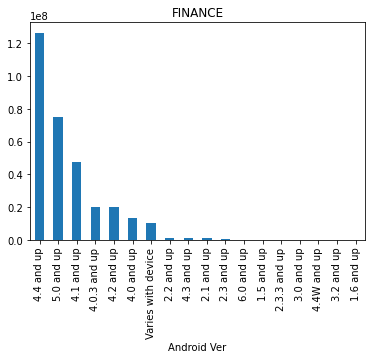

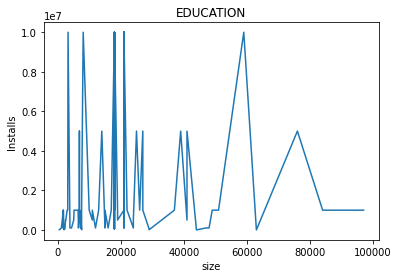

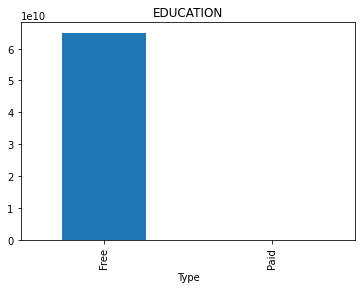

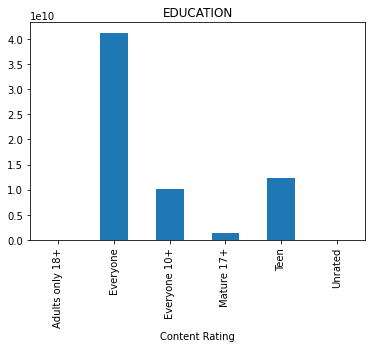

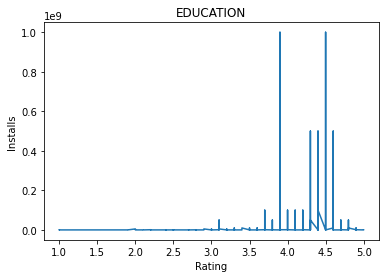

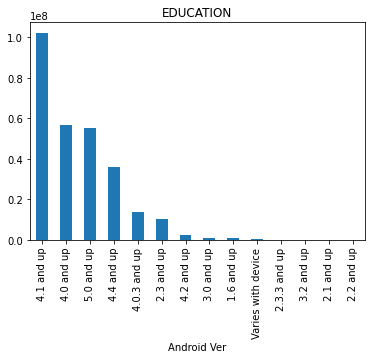

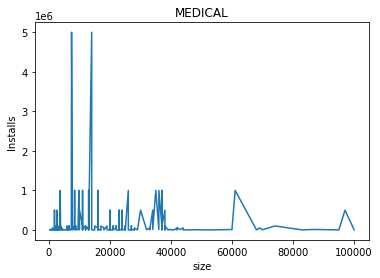

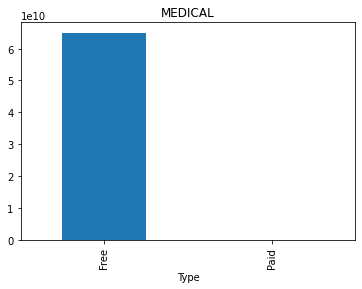

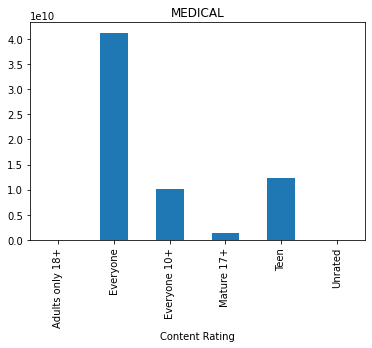

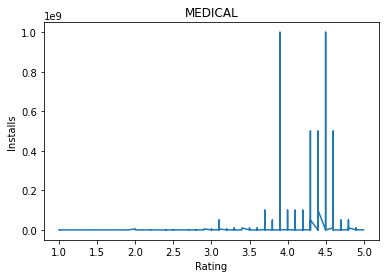

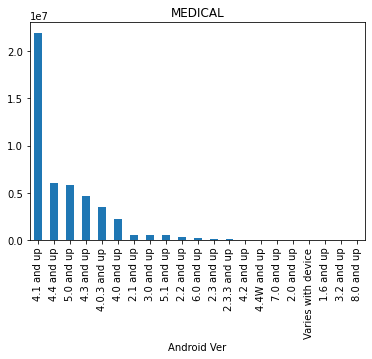

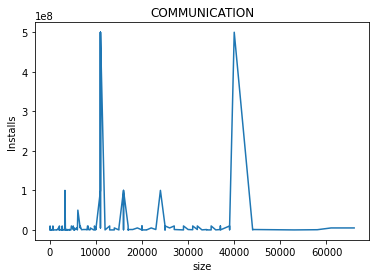

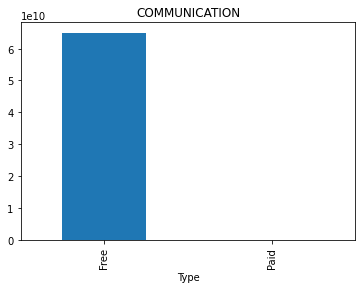

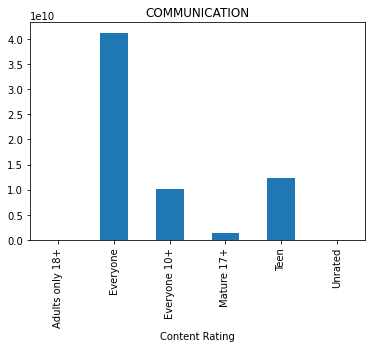

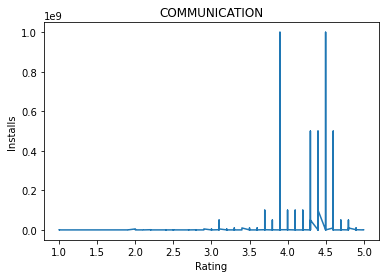

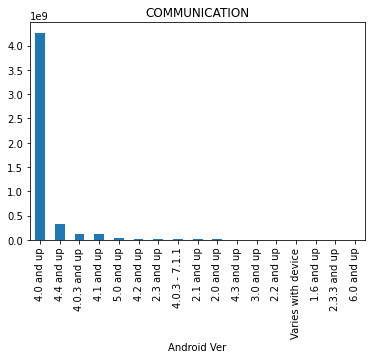

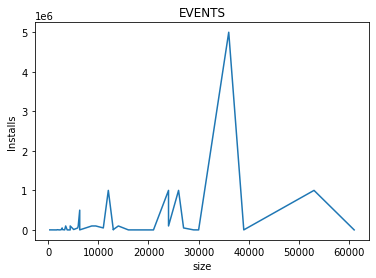

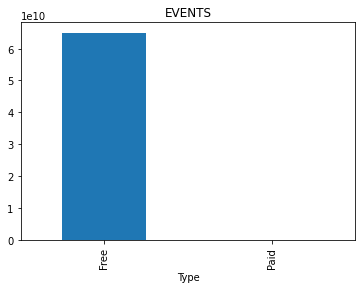

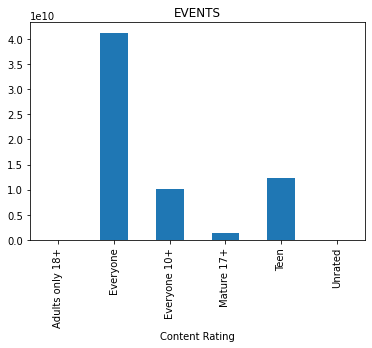

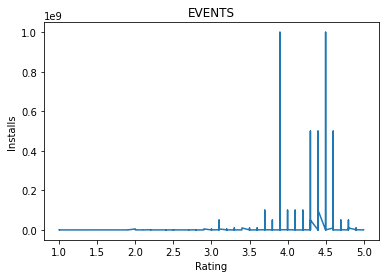

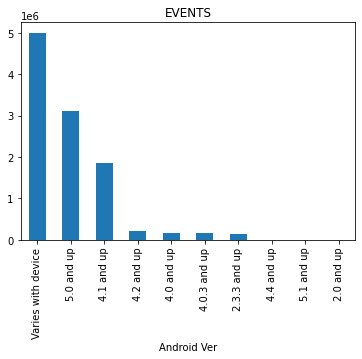

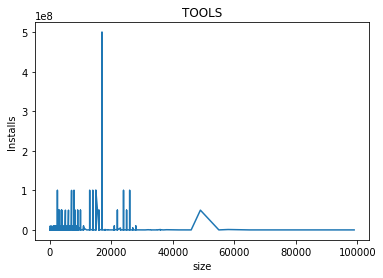

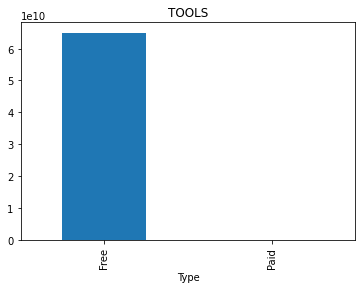

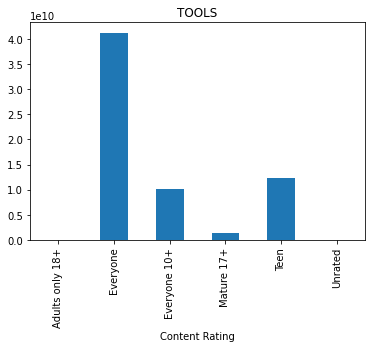

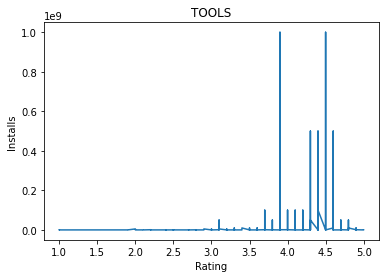

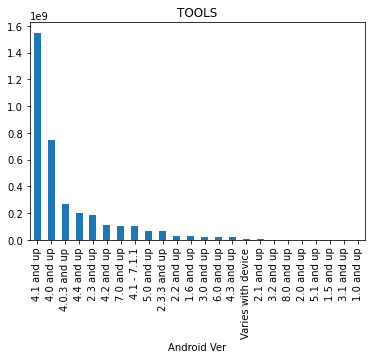

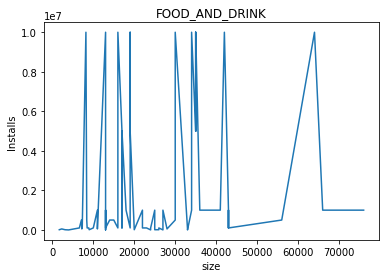

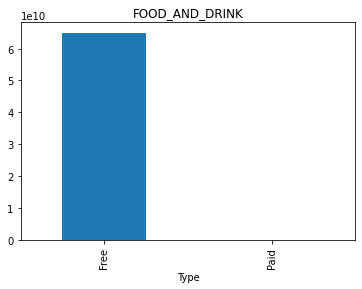

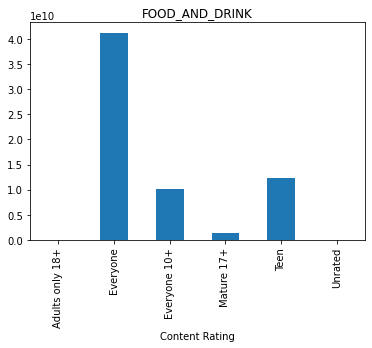

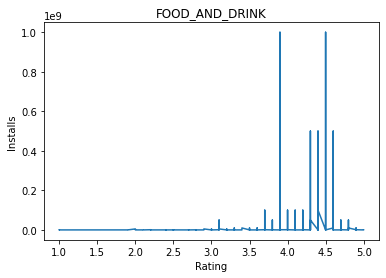

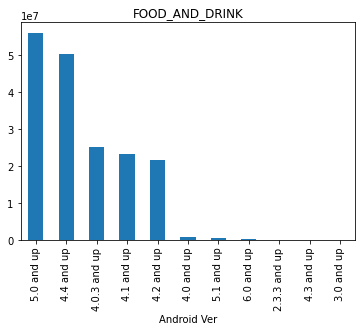

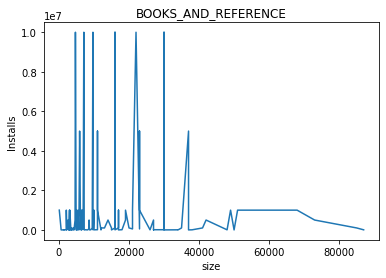

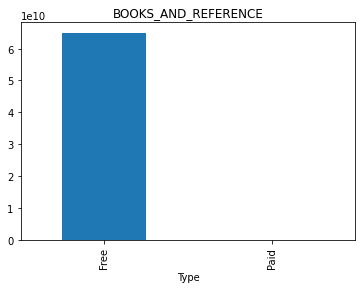

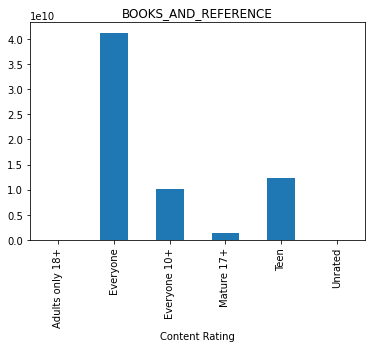

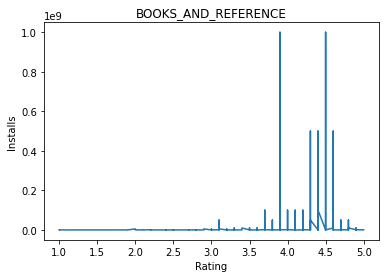

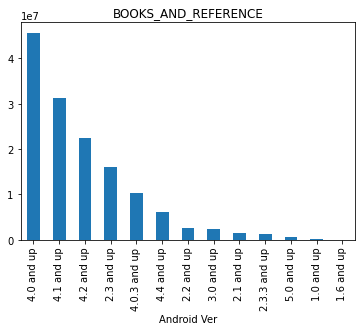

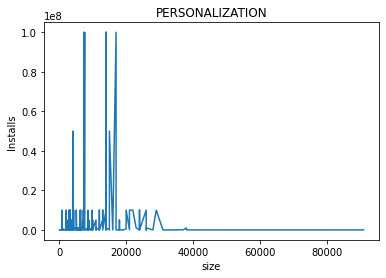

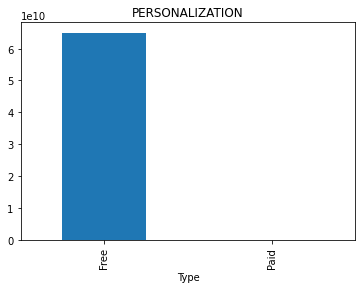

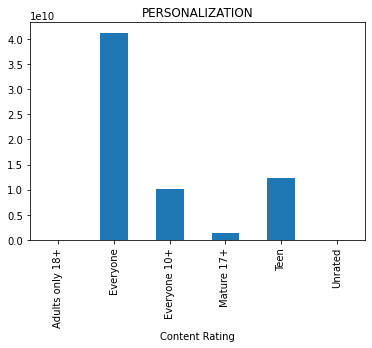

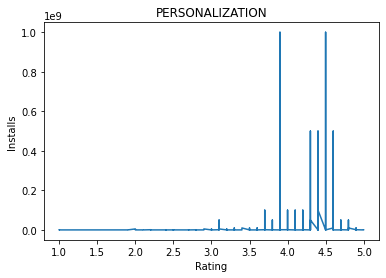

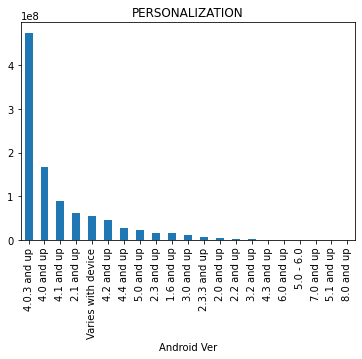

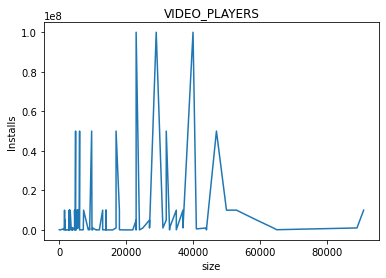

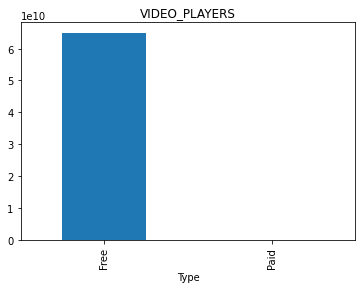

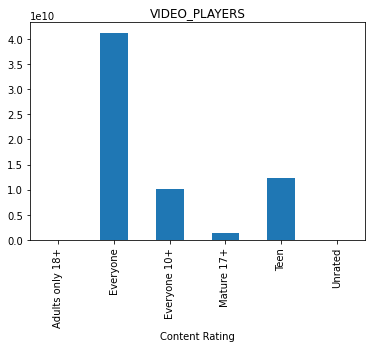

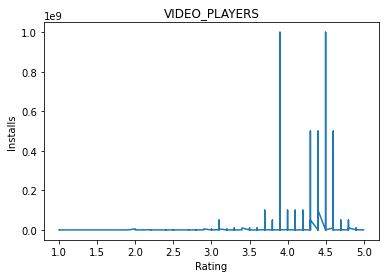

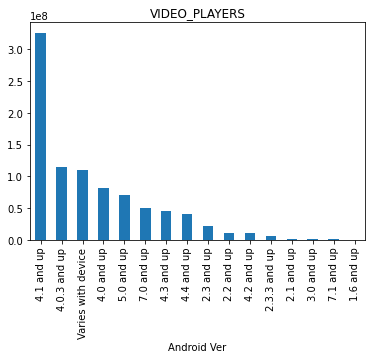

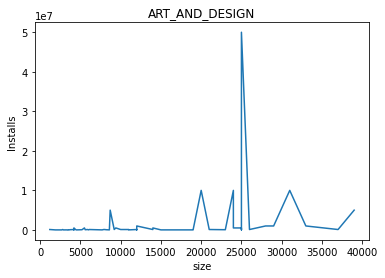

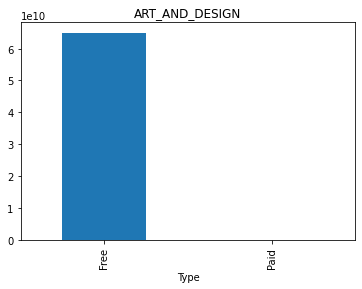

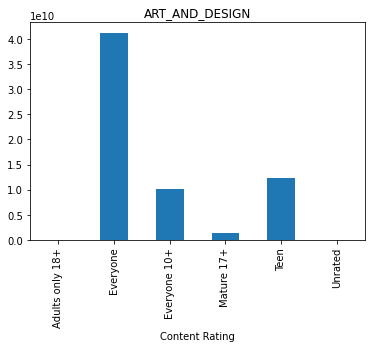

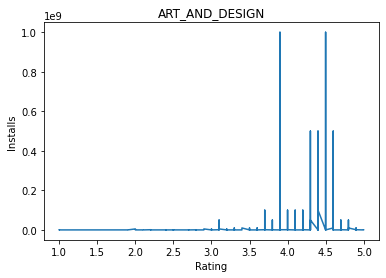

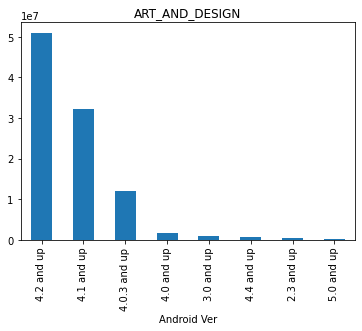

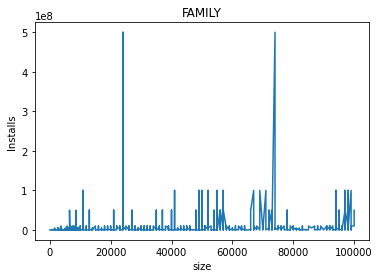

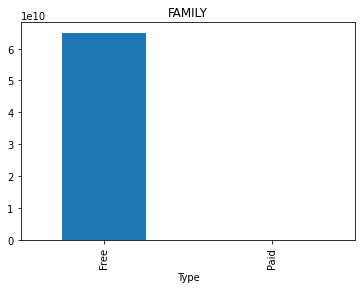

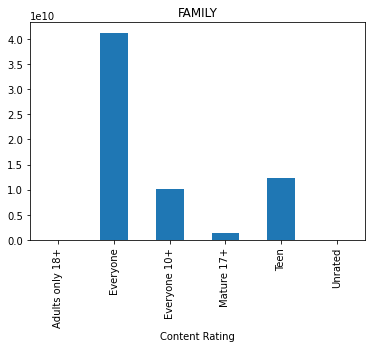

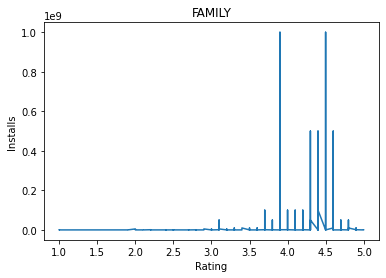

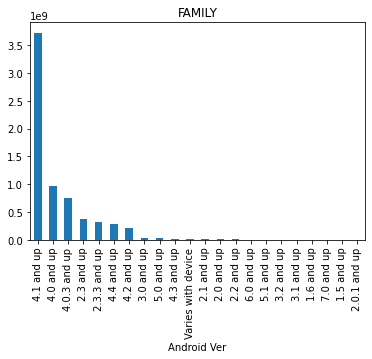

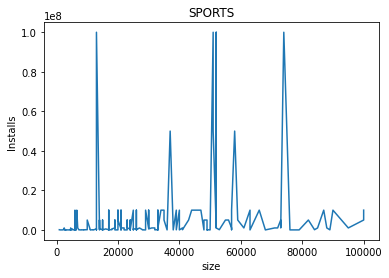

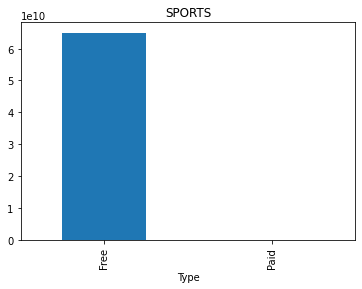

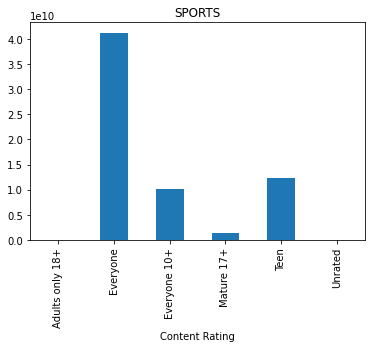

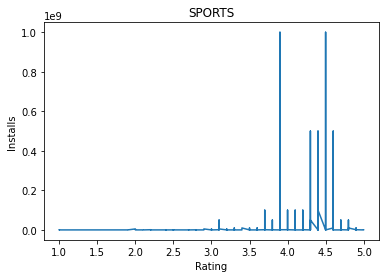

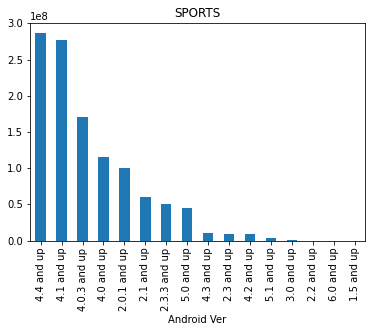

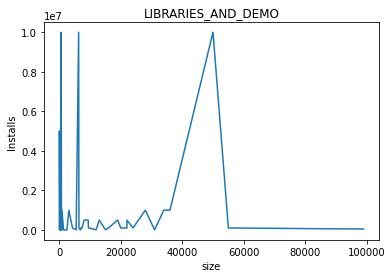

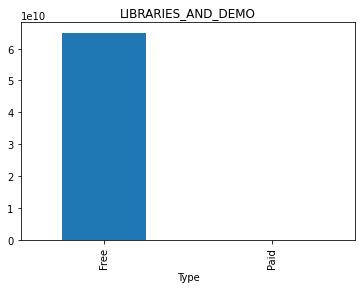

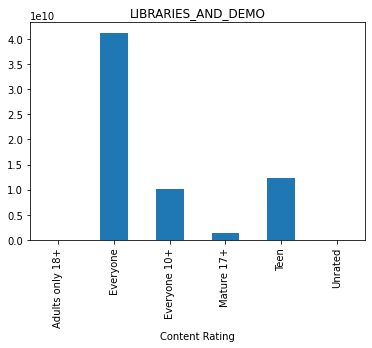

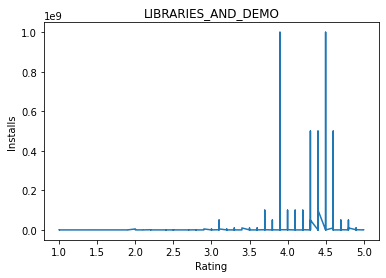

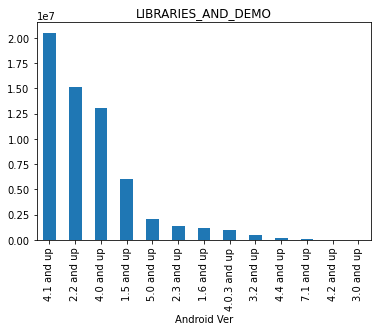

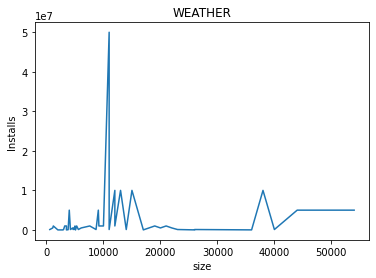

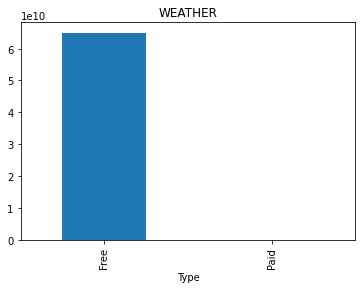

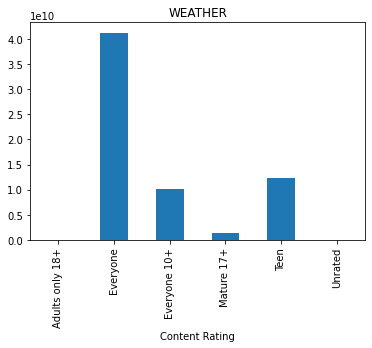

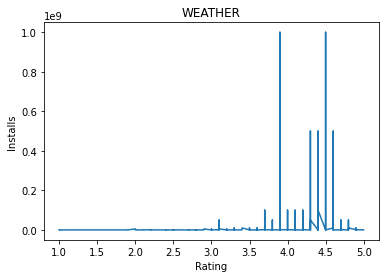

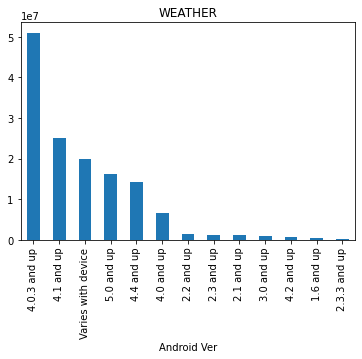

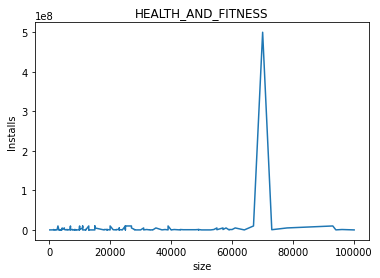

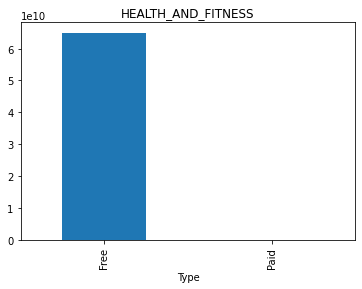

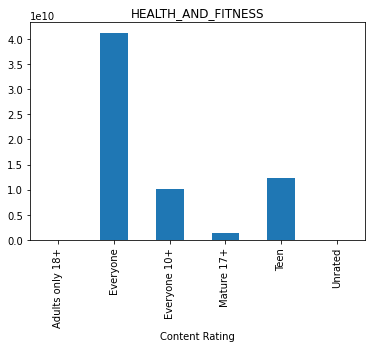

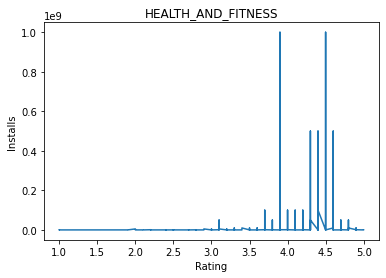

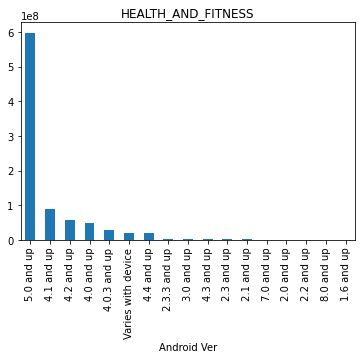

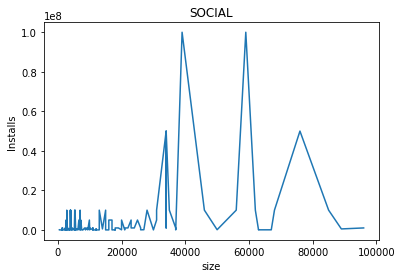

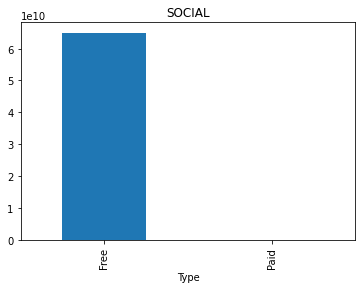

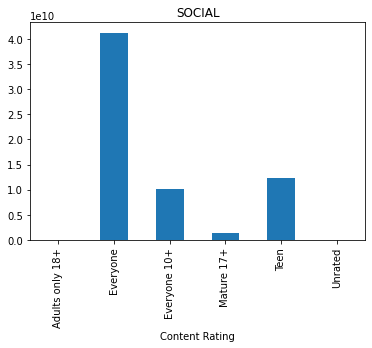

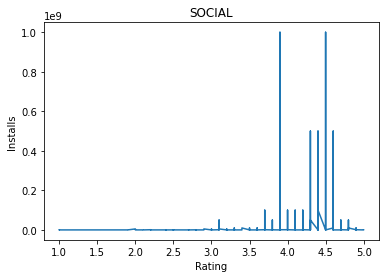

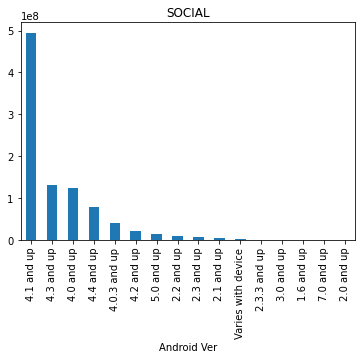

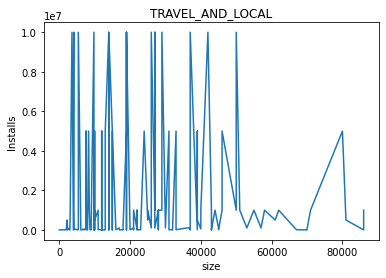

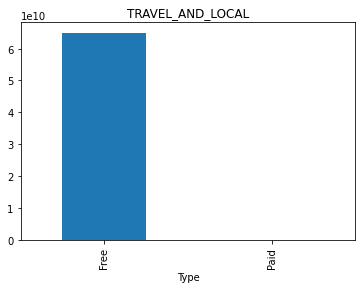

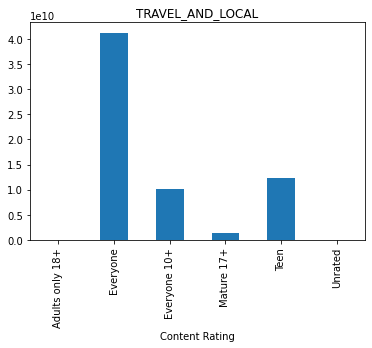

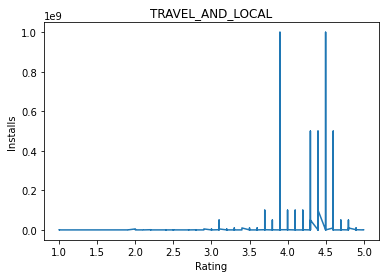

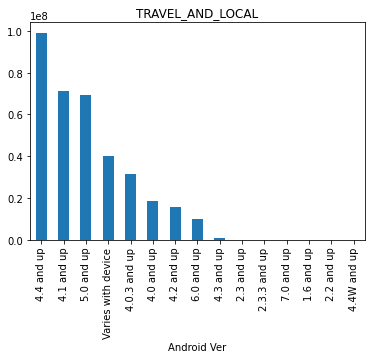

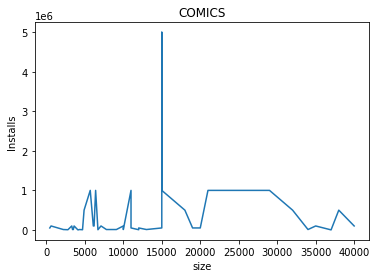

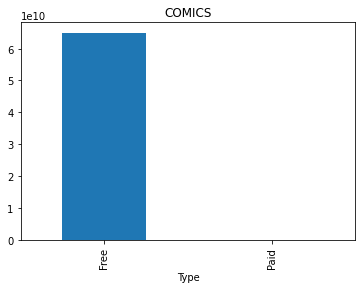

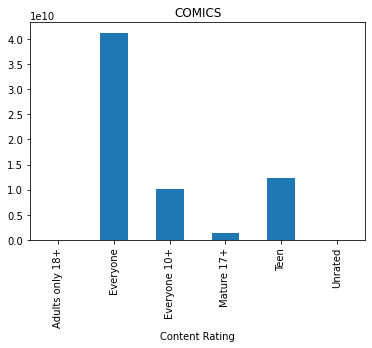

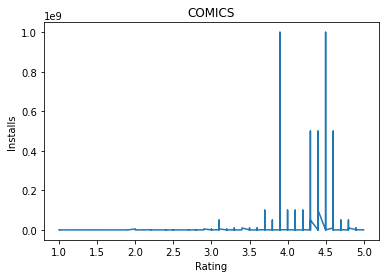

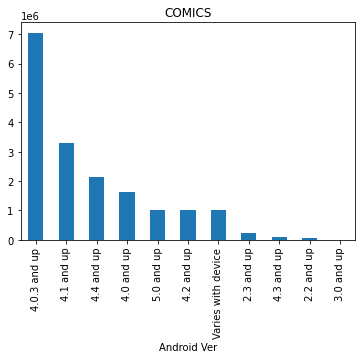

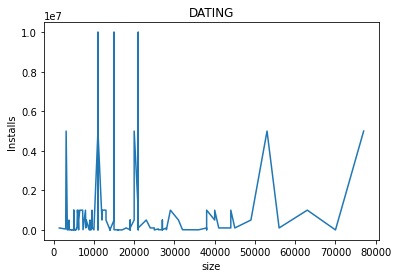

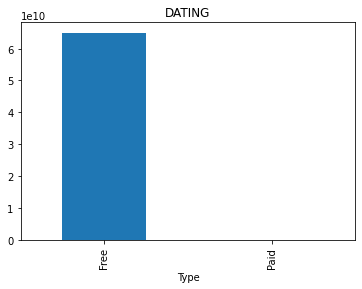

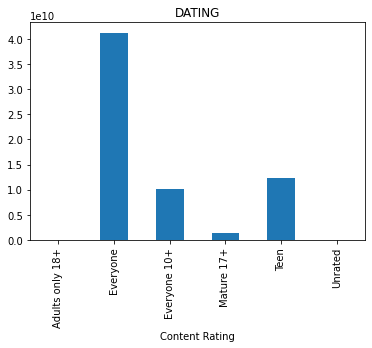

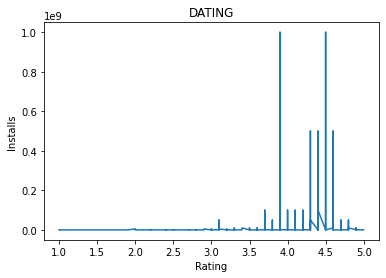

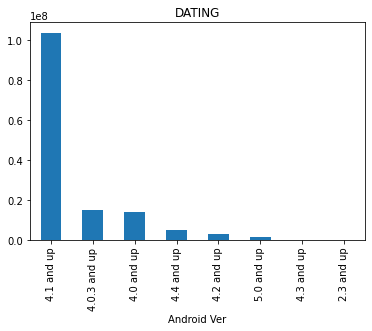

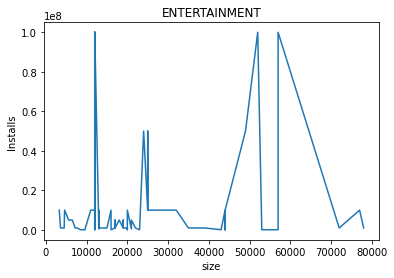

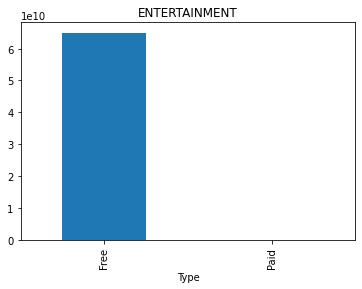

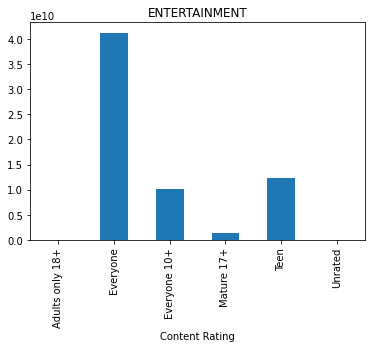

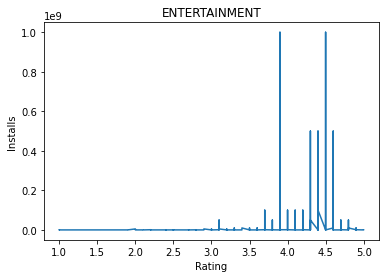

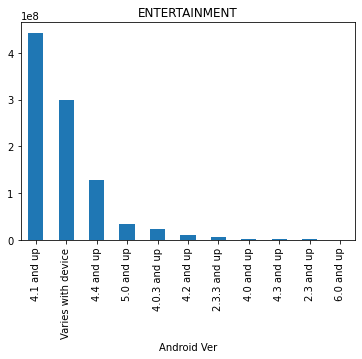

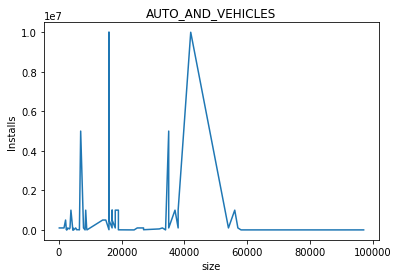

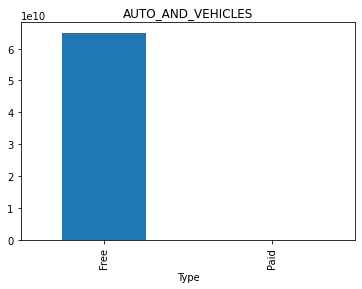

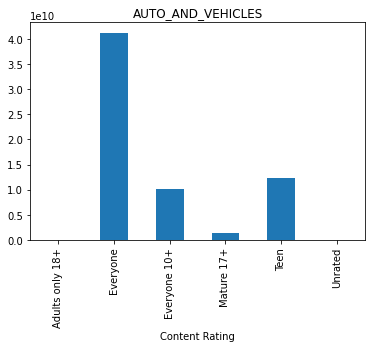

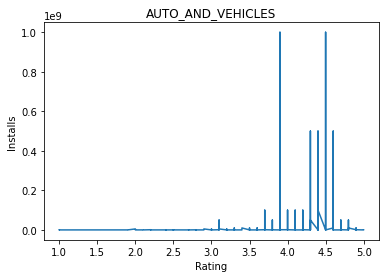

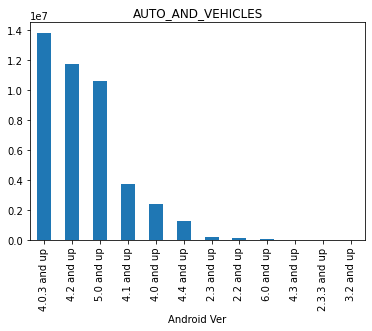

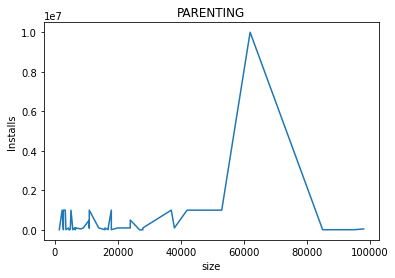

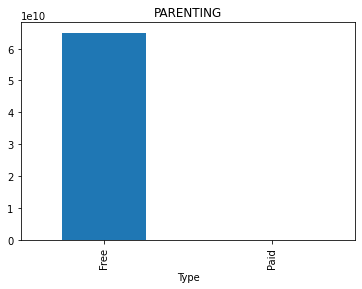

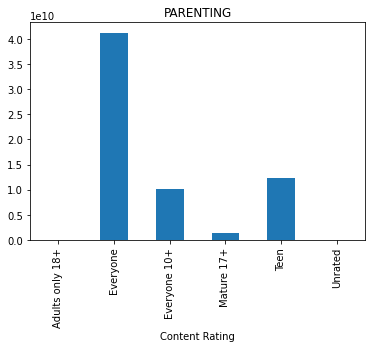

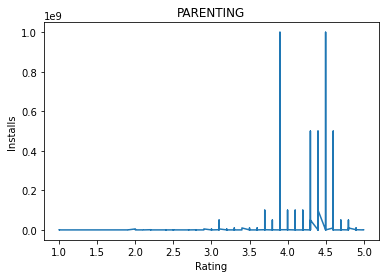

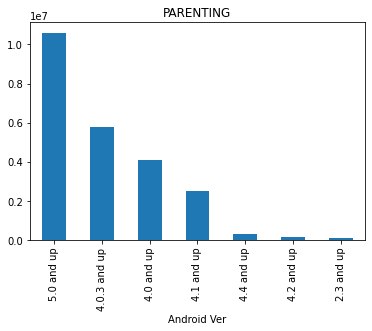

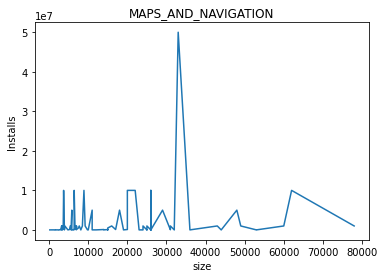

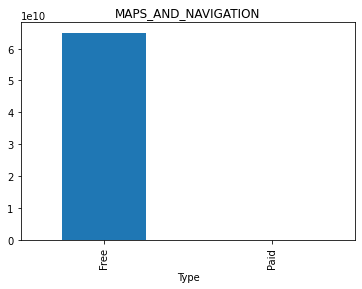

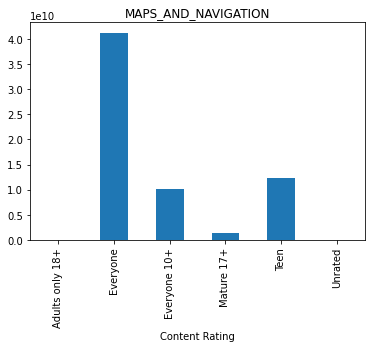

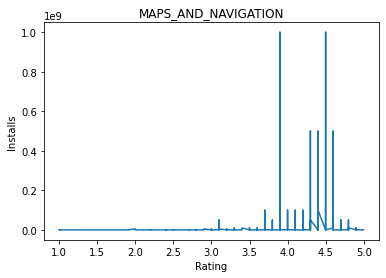

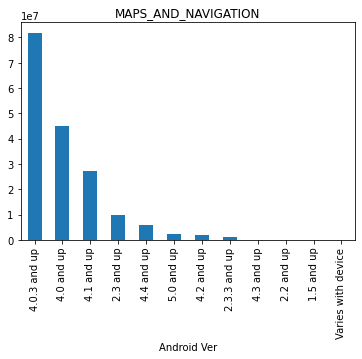

In [42]:
kfd = (df[['Category']])
tft =  kfd.values.tolist()
kft = []
for i in tft:
  kft.append(i[0])
kft = list(set(kft))
print(kft)
for i in kft:
  new_df = df[df['Category'] == i]
  # print(new_df)
  # print(type(new_df))
  insights_func(new_df,i)

In [43]:
Av=df['Android Ver'].value_counts()
print(Av)

4.1 and up            1932
4.0.3 and up          1194
4.0 and up            1109
4.4 and up             806
2.3 and up             566
5.0 and up             490
4.2 and up             318
2.3.3 and up           235
3.0 and up             211
2.2 and up             206
4.3 and up             195
2.1 and up             113
1.6 and up              87
Varies with device      56
6.0 and up              45
7.0 and up              39
3.2 and up              31
2.0 and up              27
5.1 and up              17
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64


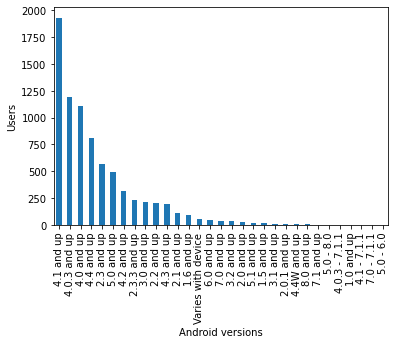

In [44]:
Av.plot.bar()
plt.ylabel('Users')
plt.xlabel('Android versions')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

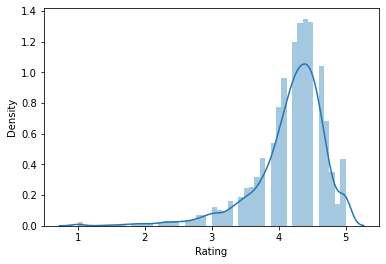

In [45]:
sns.distplot(df['Rating'])
plt

In [46]:
skew_dist=df['Rating'].skew()
mean=df['Rating'].mean()
median=df['Rating'].median()
print('the skew distribution of ratings',skew_dist)
print('the mean distribution of ratings',mean)
print('the median of disrtibution of ratings',median)


the skew distribution of ratings -1.7502704408271061
the mean distribution of ratings 4.173851727260969
the median of disrtibution of ratings 4.3


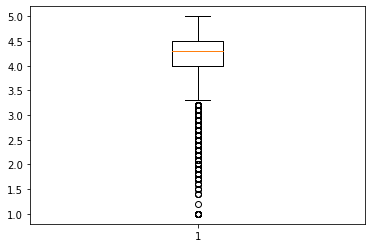

In [47]:
plt.boxplot(df['Rating'])
plt.show()

In [48]:
df['Type'].value_counts()

Free    7150
Paid     579
Name: Type, dtype: int64

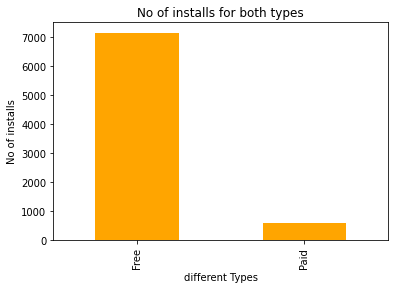

In [49]:
df1=df.groupby(['Type'])['Installs'].count()
df1.plot.bar(color='orange')
plt.title('No of installs for both types')
plt.ylabel('No of installs')
plt.xlabel('different Types')
plt.show()

([<matplotlib.patches.Wedge at 0x7f0001457b50>,
 [Text(-1.0696773260443475, 0.2564964291108457, 'Free'),
  Text(1.0696773260443473, -0.2564964291108463, 'Paid')],
 [Text(-0.5834603596605531, 0.13990714315137037, '92.5%'),
  Text(0.583460359660553, -0.1399071431513707, '7.5%')])

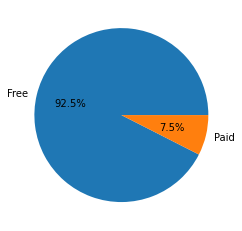

In [50]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

In [51]:
df['Content Rating'].value_counts()

Everyone           6172
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

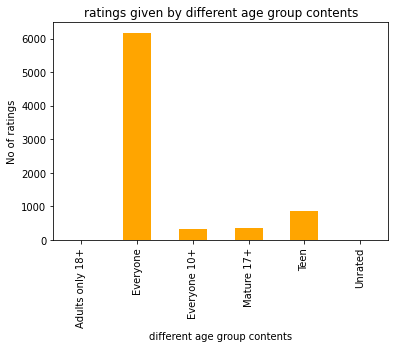

In [52]:

df1=df.groupby(['Content Rating'])['Rating'].count()
df1.plot.bar(color='orange')
plt.title('ratings given by different age group contents')
plt.ylabel('No of ratings')
plt.xlabel('different age group contents')
plt.show()

In [53]:
Installs_Cat =df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
Installs_Cat.head()

,Category,Installs
0,GAME,29874452717
1,FAMILY,6798433580
2,COMMUNICATION,4941915530
3,NEWS_AND_MAGAZINES,4251900550
4,TOOLS,3526053500


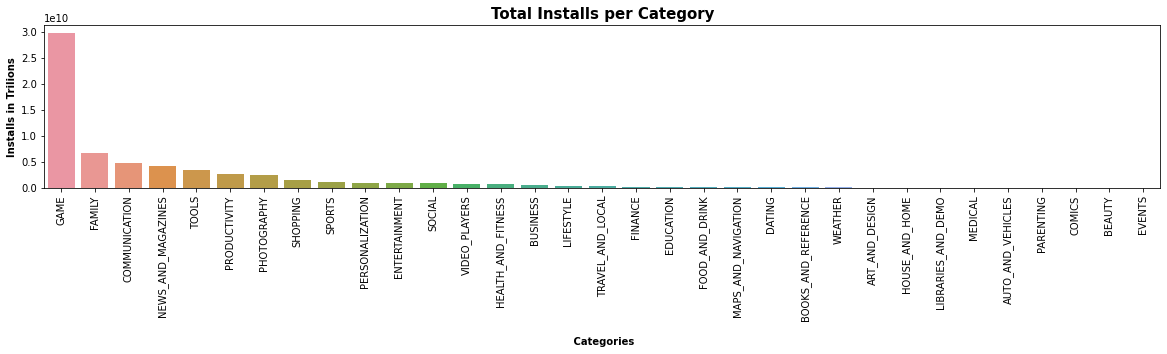

In [54]:
df2= plt.subplots(figsize =(20,3))
sns.barplot(x=Installs_Cat['Category'], y=Installs_Cat['Installs'])
plt.xlabel('\n Categories', fontsize = 10, fontweight = 'bold')
plt.ylabel('Installs in Trilions', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.title('Total Installs per Category', fontsize = 15, fontweight = 'bold')
plt.savefig('Total Installs per Category.png')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

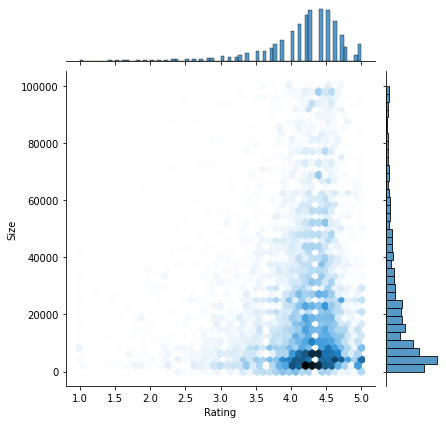

In [55]:
sns.jointplot(x='Rating',y='Size',data=df,kind='hex')  # jointplot takes numeric value only
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

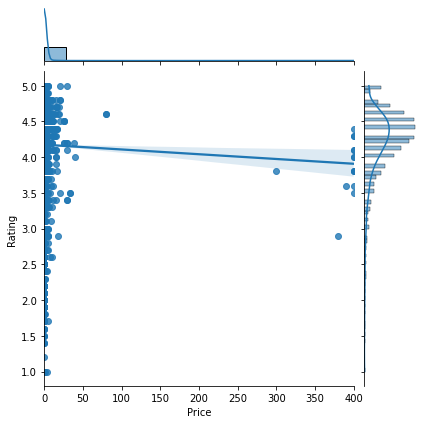

In [56]:
sns.jointplot(x='Price',y='Rating',data=df,kind='reg')
plt

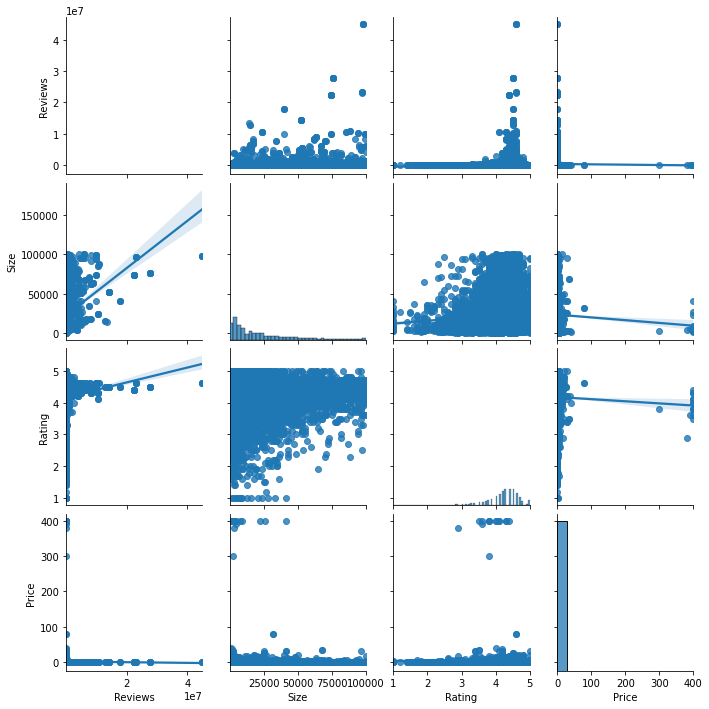

In [57]:
sns.pairplot(df,vars=['Reviews','Size','Rating','Price'],kind='reg')
plt.show()

In [58]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079823,0.083734,0.052705,-0.021303
Reviews,0.079823,1.000000,0.240414,0.626195,-0.010179
Size,0.083734,0.240414,1.000000,0.162759,-0.026240
Installs,0.052705,0.626195,0.162759,1.000000,-0.010847
Price,-0.021303,-0.010179,-0.026240,-0.010847,1.000000


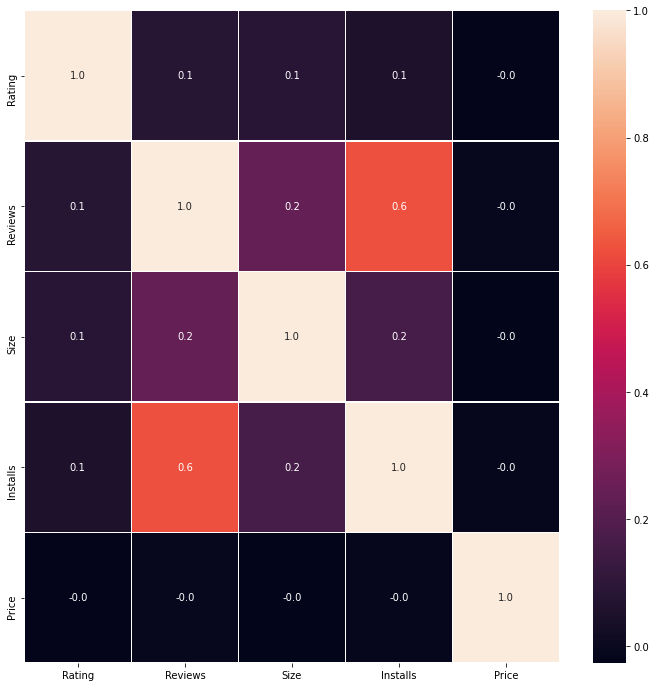

In [59]:
#Heat map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()